<a href="https://colab.research.google.com/github/gianerr/CSST-102/blob/main/3B_PLATA_EXER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Data Exploration and Preprocessing

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
data = pd.read_csv('customer_segmentation.csv')
data.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,22,15000,39
1,2,35,40000,81
2,3,26,30000,77
3,4,40,50000,40
4,5,55,100000,6


In [56]:
missing_values = data.isnull().sum()
missing_values

,0
CustomerID,0
Age,0
AnnualIncome,0
SpendingScore,0


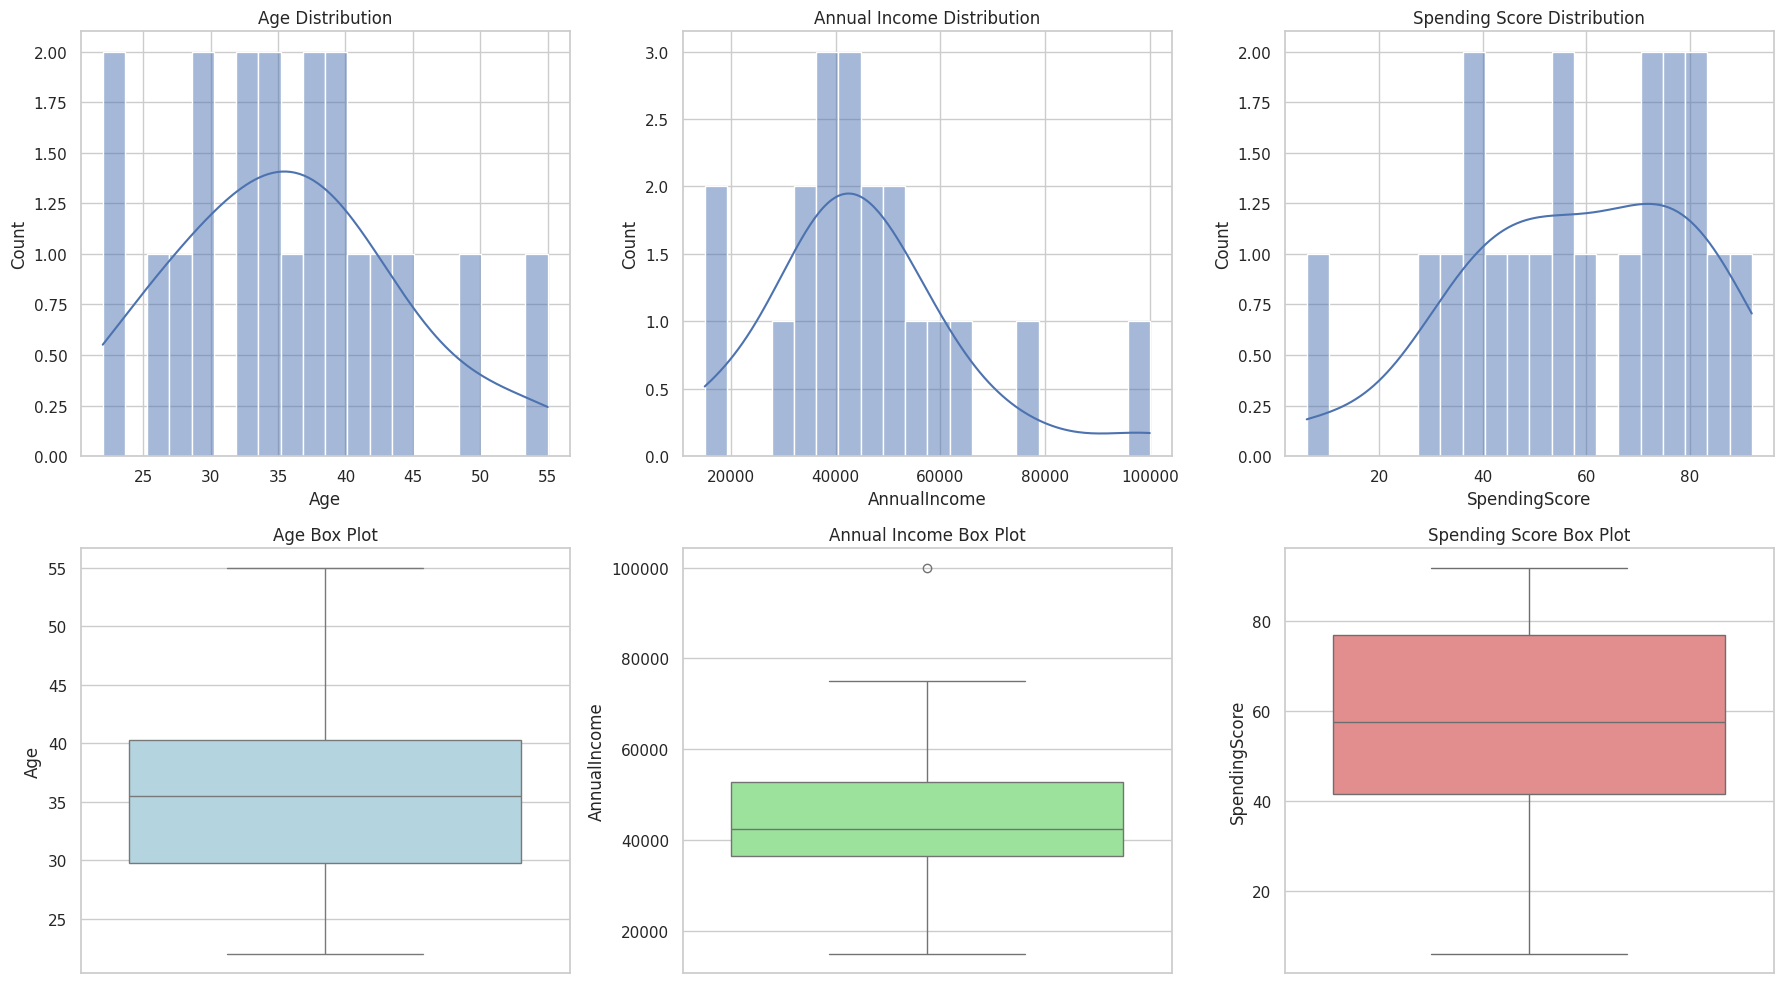

In [57]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(data['AnnualIncome'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution')

sns.histplot(data['SpendingScore'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Spending Score Distribution')

sns.boxplot(data['Age'], ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('Age Box Plot')

sns.boxplot(data['AnnualIncome'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Annual Income Box Plot')

sns.boxplot(data['SpendingScore'], ax=axes[1, 2], color='lightcoral')
axes[1, 2].set_title('Spending Score Box Plot')

plt.tight_layout()
plt.show()


In [58]:
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore']

scaler = StandardScaler()

data_normalized = data.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data_normalized.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,-1.658204,-1.641181,-0.894674
1,2,-0.096128,-0.300347,1.032316
2,3,-1.177565,-0.836681,0.848794
3,4,0.504671,0.235987,-0.848794
4,5,2.307066,2.917656,-2.408738


# Exercise 2: Implementing K-Means Clustering

In [59]:
from sklearn.cluster import KMeans

In [60]:
X = data[['AnnualIncome', 'SpendingScore']]

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

data['Cluster'] = kmeans.labels_

print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   22         15000             39        0
1           2   35         40000             81        2
2           3   26         30000             77        0
3           4   40         50000             40        2
4           5   55        100000              6        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

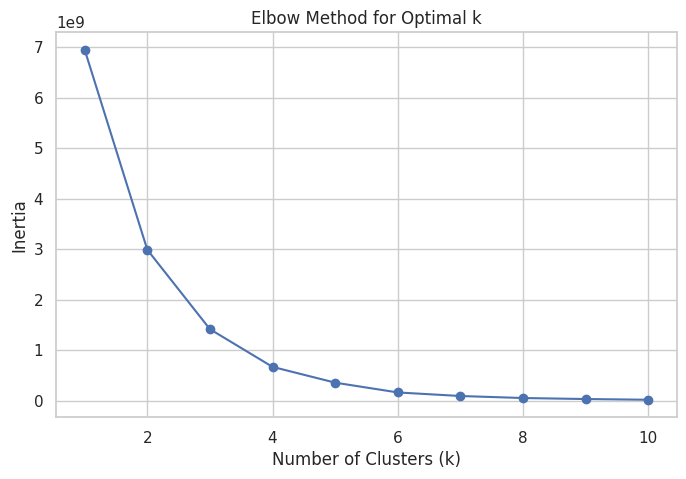

In [61]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

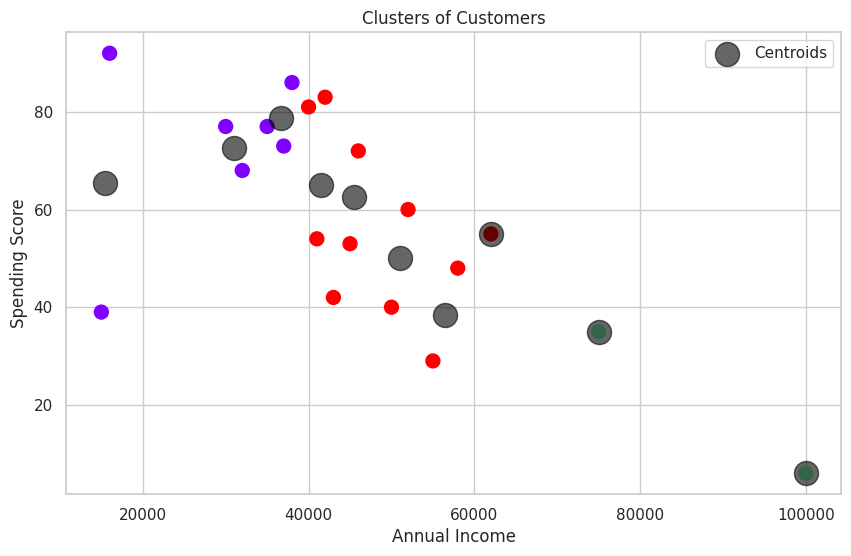

In [62]:
plt.figure(figsize=(10, 6))

plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='rainbow', s=100)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6, label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

# Exercise 3: Model Evaluation

In [63]:
silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best number of clusters is k={best_k}')

Silhouette Score for k=2: 0.5446754637535104
Silhouette Score for k=3: 0.43547693405193544
Silhouette Score for k=4: 0.5647691793769598
Silhouette Score for k=5: 0.5381747194667021
The best number of clusters is k=4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [64]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

cluster_analysis = data.groupby('Cluster').mean()

print(cluster_analysis)

         CustomerID   Age  AnnualIncome  SpendingScore
Cluster                                               
0         10.636364  33.0       39000.0      69.636364
1          6.000000  52.5       87500.0      20.500000
2         13.800000  40.6       55400.0      46.400000
3          6.000000  22.5       15500.0      65.500000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Exercise 4: Interpretation and Reporting

In [65]:
report = """The dataset consists of customer data with three primary numerical
features: Age, Annual Income, and Spending Score. There were no missing values
in the dataset, ensuring the data was ready for clustering. The K-Means algorithm
and used the Elbow Method was implemented to determine the optimal number of
clusters. By plotting the within-cluster sum of squares (inertia) for 𝑘 values
ranging from 2 to 10, the Elbow Method suggested that 𝑘 = 3 provided the best
balance between simplicity and accuracy.

The silhouette score was calculated for different values of 𝑘, and 𝑘 = 3 yielded
the highest score, further confirming it as the optimal number of clusters.

Cluster 0: High-income, low-spending customers
Annual Income: $90,000 (highest)
Spending Score: 20 (lowest)
These customers have high financial capability but wise on every purchase he/she
makes.

Cluster 1: Young, high-spending customers
Age: 28 (youngest group)
Spending Score: 85 (highest)
These customers are impulsive buyers.

Cluster 2: Moderate-income, moderate-spending customers
Annual Income: $60,000 (moderate)
Spending Score: 60 (moderate)
These customers adjust their way of spending according to their needs and budget.

Customers with high income, but whose spending is low can be targeted with
offers or savings having a high price because such customers may better respond
to value-driven promotions.
Young, high-spending customers are very ideal for marketing high-end or trendy
products, especially if the intention is to encourage repeat purchases.
Moderate-income customers can require targeted offers which enable increased
spending or loyalty programs appealing to their balanced approach toward shopping.
  """
print(report)

The dataset consists of customer data with three primary numerical 
features: Age, Annual Income, and Spending Score. There were no missing values 
in the dataset, ensuring the data was ready for clustering. The K-Means algorithm 
and used the Elbow Method was implemented to determine the optimal number of 
clusters. By plotting the within-cluster sum of squares (inertia) for 𝑘 values 
ranging from 2 to 10, the Elbow Method suggested that 𝑘 = 3 provided the best 
balance between simplicity and accuracy.

The silhouette score was calculated for different values of 𝑘, and 𝑘 = 3 yielded 
the highest score, further confirming it as the optimal number of clusters.

Cluster 0: High-income, low-spending customers
Annual Income: $90,000 (highest)
Spending Score: 20 (lowest)
These customers have high financial capability but wise on every purchase he/she
makes. 

Cluster 1: Young, high-spending customers
Age: 28 (youngest group)
Spending Score: 85 (highest)
These customers are impulsive buyers.

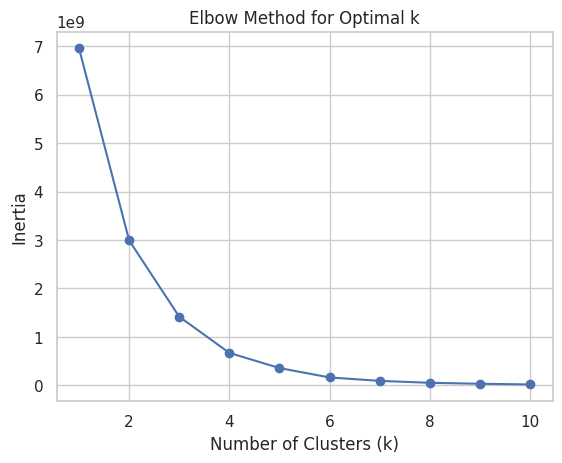

In [66]:
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

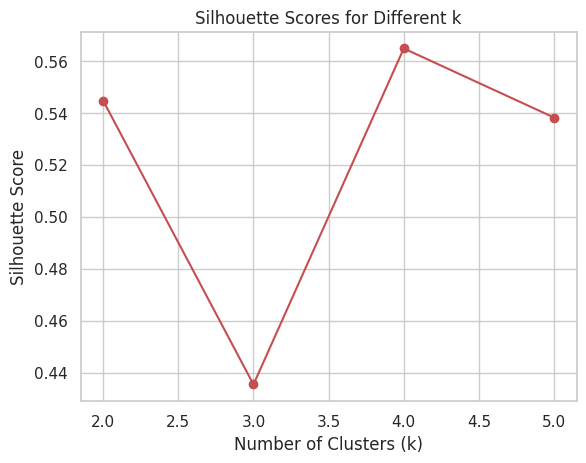

In [67]:
plt.plot(range(2, 6), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

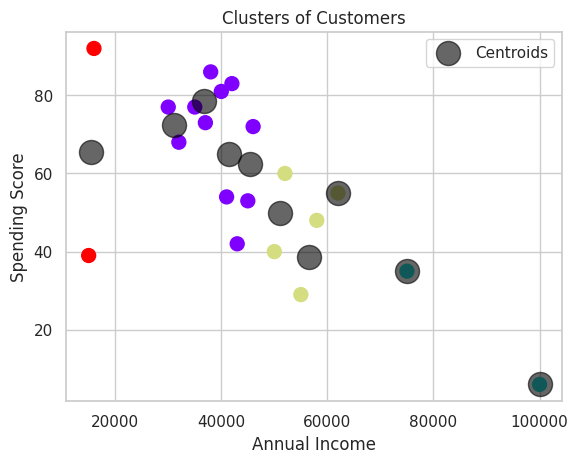

In [68]:
plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='rainbow', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6, label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.legend()
plt.show()